In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading the Data

performing a linear regression with one variable to predict profits for a food truck. 
The data contains 2 columns, population of a city (in 10,000s) and the profits of the food 
truck (in 10,000s).

In [29]:
data = pd.read_csv(r'D:\MYLEARN\datasets\ex1data1.txt', 
                   names = ['population', 'profit'])

In [30]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [31]:
## Split population and profit into X and y
X_df = pd.DataFrame(data.population)
y_df = pd.DataFrame(data.profit)

X = X_df['population'].values
y = y_df['profit'].values

## Length, or number of observations, in our data
no_samples = len(y_df)

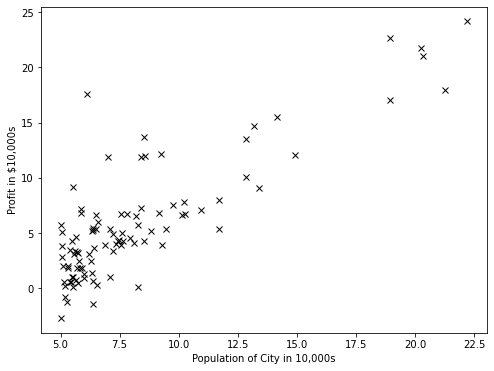

In [32]:
plt.figure(figsize=(8, 6))

plt.plot(X_df, y_df, 'kx')

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

The idea of linear regression is to find a relationship between our target or dependent 
variable ($y$) and a set of explanatory variables ($x_1$, $x_2$ ...). 
This relatonship can then be used to predict other values.

multi-variable linear equation might look like this, where $w$ represents the coefficients, or weights, our model will try to learn.
$ f(x,y,z) = w_1 x + w_2 y + w_3 z$

In our case with one variable, this relationship is a line defined by parameters beta 
and the following form: profit = $w_1$.Population

#### cost function 

$$MSE =  \frac{1}{2N} \sum_{i=1}^{n} (y_i - (m x_i + b))^2$$

- N  is the total number of observations (data points)
- $\frac{1}{N} \sum_{i=1}^{n}$ is the mean
- $y_i$ is the actual value of an observation and $mx_i+b$ is our prediction


In [33]:
def compute_cost(X, y, coeffs):

    # number of training examples
    no_samples = len(y) 
    
    ## Calculate the cost with the given parameters
    J = np.sum(np.square(np.matmul(X, coeffs) - y)) / (2 * no_samples)
    
    return J

the data looks like this (sample)

| X  | y | $b_0$ | $b_1$ | $\hat{y} is b_0 + b_1. X$ | y - $\hat{y}$ |
| ---|---|-------|-------|--------------------------| --------------|
| .. | ..| ..    | ..    | ...                      | ...           |
| .. | ..| ..    | ..    | ...                      |...           |
| .. | ..| ..    | ..    | ...                      |...           |
| .. | ..| ..    | ..    | ...                      |...           |





#### gradient descent function

$$ \begin{split}\begin{align}
f'(m,b) =
  \begin{bmatrix}
    \frac{df}{dm}\\
    \frac{df}{db}\\
  \end{bmatrix}
&=
  \begin{bmatrix}
    \frac{1}{N} \sum -x_i \cdot 2(y_i - (mx_i + b)) \\
    \frac{1}{N} \sum -1 \cdot 2(y_i - (mx_i + b)) \\
  \end{bmatrix}\\
&=
  \begin{bmatrix}
     \frac{1}{N} \sum -2x_i(y_i - (mx_i + b)) \\
     \frac{1}{N} \sum -2(y_i - (mx_i + b)) \\
  \end{bmatrix}
\end{align}\end{split} 
$$

$$ \text{gradient} = - \frac{1}{\text{no_samples}} X(\text{targets} - \text{predictions})$$

In [34]:
def gradient_descent(X, y, coeffs, alpha, iterations):
    
    # number of training examples
    no_samples = len(y) 

    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(coeffs)
        loss       = hypothesis - y
        
        gradient = X.T.dot(loss)/no_samples
              
        coeffs = coeffs - alpha * gradient
        
        # Alternative
        #t0 = theta[0] - (alpha / no_samples) * np.sum( np.dot(X, theta) - y)
        #t1 = theta[1] - (alpha / no_samples) * np.sum((np.dot(X, theta) - y) * X[:, 1])     
        #theta = np.array([t0, t1])
        
        cost  = compute_cost(X, y, coeffs)
        
        cost_history[iteration] = cost

    return coeffs, cost_history

a column of 1s is prepended onto the input data. This allows us to vectorize the cost function, as well as make it usable for multiple linear regression later. This first value $θ_0$ now behaves as a constant in the cost function.

In [35]:
# Initialize
coeffs = np.array([0, 0])

X_1s    = np.c_[np.ones((len(X), 1)), X]
y      = y

#### test the cost function

In [36]:
cost = compute_cost(X_1s, y, coeffs)

print('coeffs:', coeffs)
print('cost  :', cost)

coeffs: [0 0]
cost  : 32.072733877455676


We’ll now minimize the cost using the __gradient descent__ algorithm. 

Intuitively, gradient descent takes small, linear hops down the slope of a function in each feature dimension, with the size of each hop determined by the partial derivative of the cost function with respect to that feature and a __learning rate__ multiplier __α__. 

In [37]:
iterations = 1500
alpha      = 0.01 # non-trivial parameter

In [38]:
(coeffs, cost_history) = gradient_descent(X_1s, y, coeffs, alpha, iterations)

In [39]:
print (coeffs)
print (cost_history[-1])

[-3.63029144  1.16636235]
4.483388256587726


In [40]:
np.array([7,   1])

array([7, 1])

In [20]:
## Prediction
print (np.array([[1, 7]]).dot(coeffs))
print (np.array([[1, 3]]).dot(coeffs))

[4.53424501]
[-0.13120439]


In [21]:
## Plotting the best fit line
best_fit_x = np.linspace(X.min(), X.max(), 200)
best_fit_y = [coeffs[0] + coeffs[1] * xx for xx in best_fit_x]

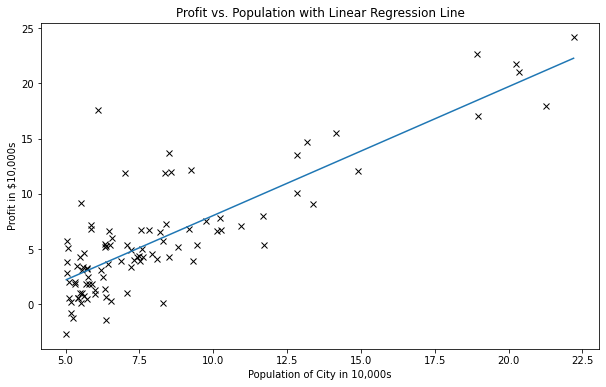

In [22]:
plt.figure(figsize=(10,6))

plt.plot(X, y, 'kx')
plt.plot(best_fit_x, best_fit_y, '-')

#plt.axis([0,25,-5,25])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs. Population with Linear Regression Line');

#### Use linear regression (sklearn)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_df, y_df)

y_pred = linreg.predict(X_df)

In [25]:
from sklearn import metrics

In [26]:
metrics.mean_squared_error(y_df, y_pred)

8.953942751950356

In [27]:
linreg.intercept_, linreg.coef_

(array([-3.89578088]), array([[1.19303364]]))

In [167]:
## make predictions
linreg.predict([[7]])

array([[4.45545463]])